In [12]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.style.use('seaborn-white')
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 18

from PIL import Image
import PIL
from io import BytesIO


# Compression d'images JPEG et JPEG2000

18 Mars 22: il y a un probleme tant en JPEG ou en JPEG2000 avec tous les utilitaires Liunx ImageMagick/cjpeg et ou PIL : la PSNR en fonction du nombre de bits par pixel (R) ne suit pas la pente theorique pour R>1. Il y a un manque de qualité. 

In [59]:
image = "lena.png"#  "lena.png" # ou "boat.png"
compress_type="JPEG2000"   # ou "JPEG" ou "JPEG2000"

In [60]:
imgOrig = Image.open(image).convert('L')
imgOrig_arr = np.array(imgOrig)*1.

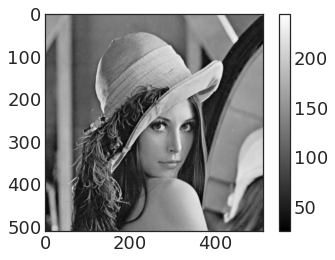

In [61]:
plt.imshow(imgOrig_arr, interpolation=None, cmap='gray')
plt.colorbar()

In [56]:
bppAll = []
PSNRAll = []
qJPEG = [3, 4, 5, 6, 7, 8, 10, 15, 20, 25, 30, 40, 50, 60, 70, 75, 80, 85, 90, 92, 93, 95, 96, 97]
qJPEG2000 = [20, 21, 22, 23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,45,50]
q_fact = qJPEG if compress_type == "JPEG" else qJPEG2000

for q in q_fact:
    with BytesIO() as f:
        if compress_type == "JPEG":
            imgOrig.save(f, format='JPEG', quality=q, optimize=True)
        else:
            imgOrig.save(f, format='JPEG2000', quality_mode='dB', quality_layers=[q])
        img_file_size_jpeg = f.getbuffer().nbytes
        bpp=img_file_size_jpeg * 8./512**2
        f.seek(0)
        ima_jpg = Image.open(f)
        ima_jpg.load()
        ima_jpg = np.array(ima_jpg)*1.

    
    MSE = np.sum((imgOrig_arr-ima_jpg)**2)/512**2
    PSNR = 10*np.log10(255**2/MSE)
    bppAll.append(bpp)
    PSNRAll.append(PSNR)

In [57]:
xval = np.linspace(0,3.5,10)
pval = 20*np.log10(2)*(xval-1)+40.

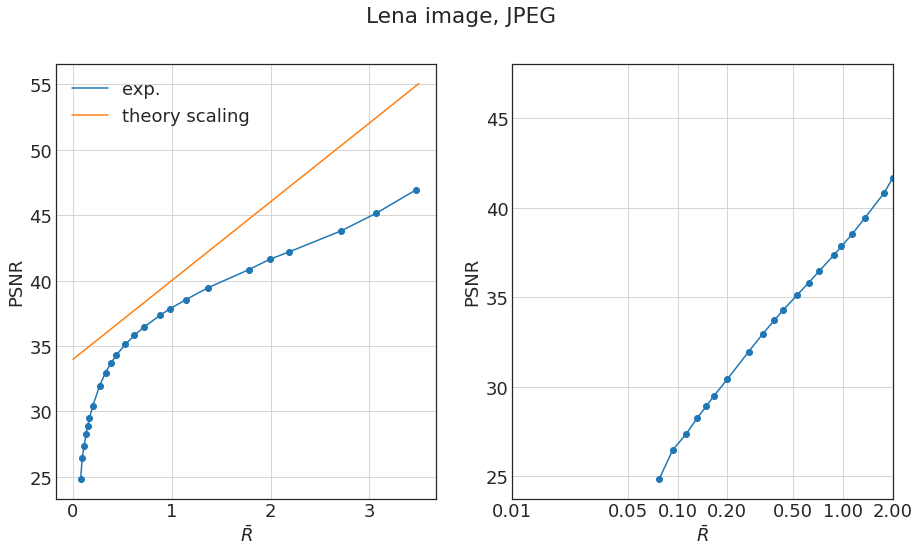

In [58]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(bppAll,PSNRAll, label="exp.")
ax[0].scatter(bppAll,PSNRAll)
ax[0].plot(xval,pval, label="theory scaling")
ax[0].set_xlabel(r"$\bar{R}$")
ax[0].set_ylabel("PSNR")
ax[0].grid()
ax[0].legend();

ax[1].plot(bppAll,PSNRAll)
ax[1].scatter(bppAll,PSNRAll)
ax[1].set_xscale("log",base=2)
ax[1].set_xticks(np.arange(1/8, 1, 1/2**3))
ax[1].set_xlabel(r"$\bar{R}$")
ax[1].set_ylabel("PSNR")
ax[1].set_xlim([0.01,1.0])
ax[1].grid()
ax[1].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))
ax[1].xaxis.set_minor_formatter(mpl.ticker.FormatStrFormatter('%.2f'))
ax[1].set_xticks([0.01,0.05,0.1,0.2,0.5,1.0,2.0])
fig.suptitle(f"Lena image, {compress_type}");
